## Feynn Labs - Machine Learning Internship

### Task - Brain tumor detection using Machine Learning

Outline :
1. Importing Libraries
2. Data Analysis
3. Train-Test Split
4. Feature Scaling
5. Model Building 
6. Model Evaluation
7. Validation on test data

### Importing Libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Analysis(Cleaning and Preparation)

In [3]:
import os

In [4]:
path = os.listdir('C:/Users/midhi/Downloads/data/Training')
# Labelling the classes
classes = {'no_tumor' : 0, 'pituitary_tumor': 1}

In [6]:
import cv2
# Creating two lists, in X we will append all images and Y we will append the target variables
X = []
Y = []

for cls in classes:
    pth = 'C:/Users/midhi/Downloads/data/Training/' + cls
    
    for j in os.listdir(pth):
        # Reading the image
        img = cv2.imread(pth+'/'+j, 0)
        # All images must be of same size before passing it to our model
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])          

In [8]:
# Checking the two classes
np.unique(Y)

array([0, 1])

In [10]:
# Converting both of them into array form
X = np.array(X)
Y = np.array(Y)

In [12]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

827 patients have a brain tumor

In [14]:
X.shape

(1222, 200, 200)

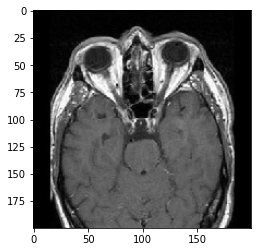

In [19]:
# Visualizing the first image
plt.imshow(X[0],cmap='gray')
plt.show()

In [51]:
# Reshaping the data and converting into 2D
X_new = X.reshape(len(X),-1)
X_new.shape

(1222, 40000)

### Train test split

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,random_state=20,test_size=0.3)

In [53]:
print(x_train.shape)
print(x_test.shape)

(855, 40000)
(367, 40000)


### Feature Scaling

In [54]:
# For images the rgb range is between (0,255), hence doing this
x_train = x_train/255
x_test = x_test/255

print('\nAfter feature scaling:\n')
print(x_train.max(),x_train.min())
print(x_test.max(),x_test.min())


After feature scaling:

1.0 0.0
1.0 0.0


### Model Building & Evaluation - I) Logistic Regression

In [85]:
# Fitting the LogisticRegression model to training set
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression()

In [86]:
# Predicting the test set result
y_pred = logistic.predict(x_test)

In [87]:
# Model score on training and testing set
print('Training Score :',logistic.score(x_train,y_train))
print('Testing Score :',logistic.score(x_test,y_test))

Training Score : 1.0
Testing Score : 0.9564032697547684


In [88]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[101  13]
 [  3 250]]


We have an accuracy of 100% on our training dataset and a accuracy of 95.6% on our testing dataset, along with that from the confusion matrix we can see that our model has predicted 351 instances and clearly while it has misclassified 16 instances

### Model Building & Evaluation - II) Support Vector Machine 

In [79]:
# Fitting the SVC model to training set
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [80]:
# Predicting the test set result
y_pred = logistic.predict(x_test)

In [81]:
# Model score on training and testing set
print('Training Score :',svc.score(x_train,y_train))
print('Testing Score :',svc.score(x_test,y_test))

Training Score : 0.9894736842105263
Testing Score : 0.9591280653950953


We have an accuracy of 98.9% on our training dataset and a accuracy of 95.9% on our testing dataset, since the model using Logistic Regression performs better, we would we considering that model.

In [90]:
# Misclassified Instances
y_pred = logistic.predict(x_test)
np.where(y_test!=y_pred)

(array([ 25,  44,  60,  70,  86, 100, 102, 103, 114, 153, 161, 188, 198,
        232, 256, 269], dtype=int64),)

These were the 16 misclassified instances by our model.

In [93]:
# Checking
print('Actual value :',y_test[25])
print('Predicted value:',y_pred[25])


Actual value : 0
Predicted value: 1


### Validating the same on our test data

In [97]:
test = {0 : 'No tumor', 1 : 'Pituitary tumor'}

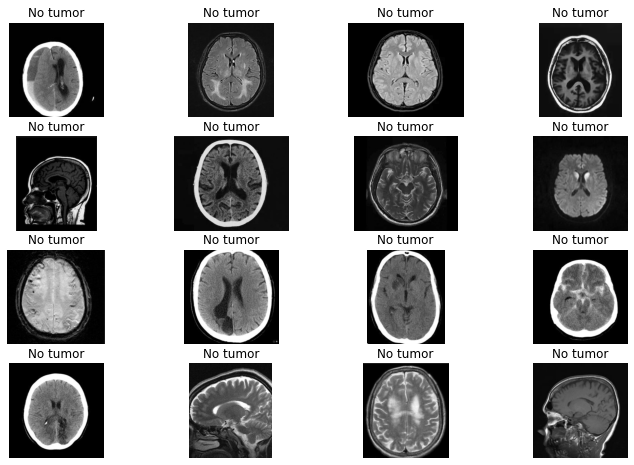

In [105]:
# Test data having images of no tumor
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/midhi/Downloads/data/Testing/')
c=1
for i in os.listdir('C:/Users/midhi/Downloads/data/Testing/no_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/midhi/Downloads/data/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = logistic.predict(img1)
    plt.title(test[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

Our model gives an accuracy of 100% by predicting all the images correctly

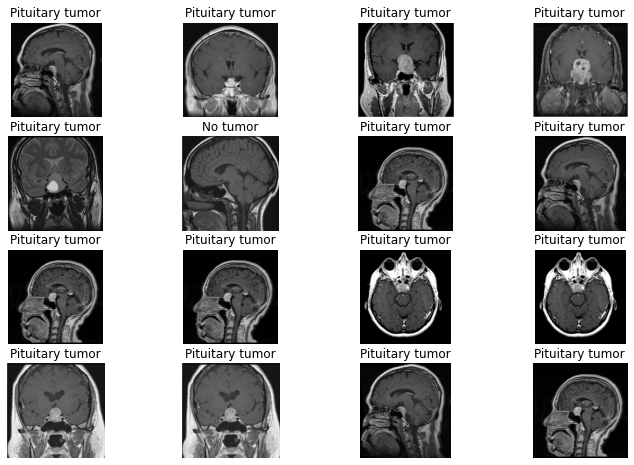

In [107]:
# Test data of images having tumor
plt.figure(figsize=(12,8))
p = os.listdir('C:/Users/midhi/Downloads/data/Testing/')
c=1
for i in os.listdir('C:/Users/midhi/Downloads/data/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('C:/Users/midhi/Downloads/data/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img,(200,200))
    img1 = img1.reshape(1,-1)/255
    p = logistic.predict(img1)
    plt.title(test[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

We have a 93.75% accuracy on our test data since it misclassified one instance, the similar procedure can be applied to check for all the images and hence the accuracy can be determined.